In [20]:
import os
import pandas as pd
import streamlit as st
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Define the cleaned data directory
BASE_DIR = os.path.abspath("../")  # Adjust as needed
CLEANED_XLSX_DIR = os.path.join(BASE_DIR, 'csv')

def load_data(filename):
    filepath = os.path.join(CLEANED_XLSX_DIR, filename)
    
    if filename.endswith('.xlsx'):
        return pd.read_excel(filepath, engine='openpyxl')
    else:
        raise ValueError("Unsupported file format. Use XLSX.")

# Load data files
raw_coverage_data = load_data('coverage-data.xlsx')
raw_incidence_data = load_data('incidence-rate-data.xlsx')
raw_vaccine_schedule_data = load_data('vaccine-schedule-data.xlsx')

In [38]:
raw_coverage_data.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'ANTIGEN', 'ANTIGEN_DESCRIPTION',
       'COVERAGE_CATEGORY', 'COVERAGE_CATEGORY_DESCRIPTION', 'TARGET_NUMBER',
       'DOSES', 'COVERAGE'],
      dtype='object')

In [40]:
raw_incidence_data['INCIDENCE_RATE'].unique()

array([   0. ,    9.3,    nan, ...,  666.1, 3358.8,  893.3])

In [ ]:
# Define the cleaned data directory
BASE_DIR = os.path.abspath("../")  # Adjust as needed
CLEANED_XLSX_DIR = os.path.join(BASE_DIR, 'cleaned_xlsx')

def load_data(filename):
    filepath = os.path.join(CLEANED_XLSX_DIR, filename)
    
    if filename.endswith('.xlsx'):
        return pd.read_excel(filepath, engine='openpyxl')
    else:
        raise ValueError("Unsupported file format. Use XLSX.")

# Load data files
coverage_data = load_data('cleaned_coverage_data.xlsx')
incidence_data = load_data('cleaned_incidence_rate.xlsx')
vaccine_schedule_data = load_data('cleaned_vaccine_schedule_data.xlsx')

In [39]:
coverage_data.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'ANTIGEN', 'ANTIGEN_DESCRIPTION',
       'COVERAGE_CATEGORY', 'COVERAGE_CATEGORY_DESCRIPTION', 'TARGET_NUMBER',
       'DOSES', 'COVERAGE'],
      dtype='object')

In [5]:
coverage_data.head()

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,28.0,25.0,99.00
1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,28.0,25.0,99.00
2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52
3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,28.0,25.0,90.52
4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69


In [6]:
incidence_data.head()

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.1
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.1
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",0.1
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.1


In [7]:
# Check for missing values
print("\nMissing values in Coverage Data:")
print(coverage_data.isnull().sum())


Missing values in Coverage Data:
GROUP                            0
CODE                             0
NAME                             0
YEAR                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
dtype: int64


In [8]:
print("\nMissing values in Incidence Data:")
print(incidence_data.isnull().sum())


Missing values in Incidence Data:
GROUP                  0
CODE                   0
NAME                   0
YEAR                   0
DISEASE                0
DISEASE_DESCRIPTION    0
DENOMINATOR            0
INCIDENCE_RATE         0
dtype: int64


In [4]:
# Merge datasets on 'Code' and 'Year'
merged_df = pd.merge(coverage_data, incidence_data, on=["CODE", "YEAR"], how="inner")


In [10]:
# Display merged data
print("\nMerged Data Sample:")
print(merged_df.head())


Merged Data Sample:
     GROUP_x CODE NAME_x    YEAR ANTIGEN ANTIGEN_DESCRIPTION  \
0  COUNTRIES  ABW  Aruba  2023.0     BCG                 BCG   
1  COUNTRIES  ABW  Aruba  2023.0     BCG                 BCG   
2  COUNTRIES  ABW  Aruba  2023.0     BCG                 BCG   
3  COUNTRIES  ABW  Aruba  2023.0     BCG                 BCG   
4  COUNTRIES  ABW  Aruba  2023.0     BCG                 BCG   

  COVERAGE_CATEGORY COVERAGE_CATEGORY_DESCRIPTION  TARGET_NUMBER  DOSES  \
0             ADMIN       Administrative coverage           28.0   25.0   
1             ADMIN       Administrative coverage           28.0   25.0   
2             ADMIN       Administrative coverage           28.0   25.0   
3             ADMIN       Administrative coverage           28.0   25.0   
4             ADMIN       Administrative coverage           28.0   25.0   

   COVERAGE    GROUP_y NAME_y          DISEASE  \
0      99.0  COUNTRIES  Aruba              CRS   
1      99.0  COUNTRIES  Aruba       DIPHTHE

In [11]:
# Save cleaned data
merged_df.to_csv("merged_vaccination_data.csv", index=False)
print("\nMerged data saved as 'merged_vaccination_data.csv'")


Merged data saved as 'merged_vaccination_data.csv'


In [12]:
incidence_data.describe()

,YEAR,INCIDENCE_RATE
count,84946.000000,84946.000000
mean,2004.095990,79.413911
std,12.595225,846.284965
min,1980.000000,0.100000
25%,1994.000000,0.100000
50%,2005.000000,0.100000
75%,2015.000000,0.900000
max,2023.000000,69101.300000


In [13]:
incidence_data.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'DISEASE', 'DISEASE_DESCRIPTION',
       'DENOMINATOR', 'INCIDENCE_RATE'],
      dtype='object')

In [14]:
coverage_data.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'ANTIGEN', 'ANTIGEN_DESCRIPTION',
       'COVERAGE_CATEGORY', 'COVERAGE_CATEGORY_DESCRIPTION', 'TARGET_NUMBER',
       'DOSES', 'COVERAGE'],
      dtype='object')

Correlation coefficient: -0.009
P-value: 0.000


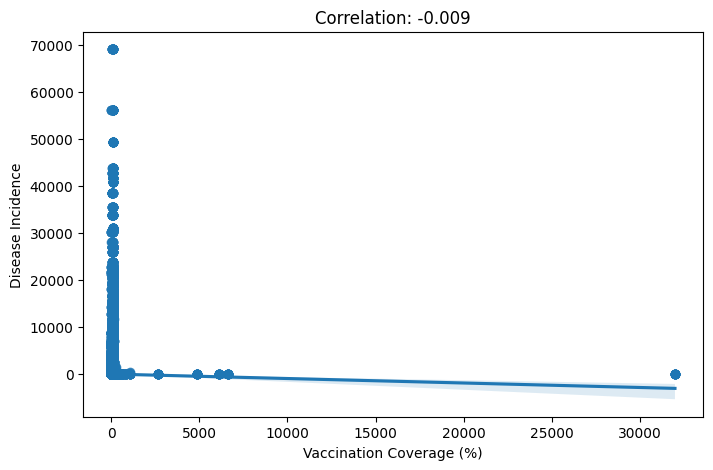

In [9]:

# Compute Pearson correlation
corr, p_value = pearsonr(merged_df['COVERAGE'], merged_df['INCIDENCE_RATE'])

print(f"Correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x=merged_df['COVERAGE'], y=merged_df['INCIDENCE_RATE'])
plt.xlabel("Vaccination Coverage (%)")
plt.ylabel("Disease Incidence")
plt.title(f"Correlation: {corr:.3f}")
plt.show()


In [16]:
print(merged_df['YEAR'].unique())


[2023. 2022. 2021. 2019. 2018. 2017. 2020. 2016. 2015. 2014. 2013. 2012.
 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000.
 1999. 1998. 1997. 1996. 1995. 1994. 1993. 1992. 1991. 1990. 1989. 1988.
 1987. 1986. 1985. 1984. 1983. 1982. 1981. 1980.]


In [14]:

# Define the year when the vaccine was introduced
vaccine_year = merged_df['YEAR'].iloc[0]  # Assuming one vaccine year

# Calculate average incidence before and after vaccination
before_vaccination = merged_df[merged_df['YEAR'] < vaccine_year]['INCIDENCE_RATE'].mean()
after_vaccination = merged_df[merged_df['YEAR'] >= vaccine_year]['INCIDENCE_RATE'].mean()

# Calculate percentage decrease
decrease_percentage = ((before_vaccination - after_vaccination) / before_vaccination) * 100

print(f"Average incidence before vaccination: {before_vaccination:.2f}")
print(f"Average incidence after vaccination: {after_vaccination:.2f}")
print(f"Percentage decrease in disease incidence: {decrease_percentage:.2f}%")

Average incidence before vaccination: 47.89
Average incidence after vaccination: 63.92
Percentage decrease in disease incidence: -33.45%


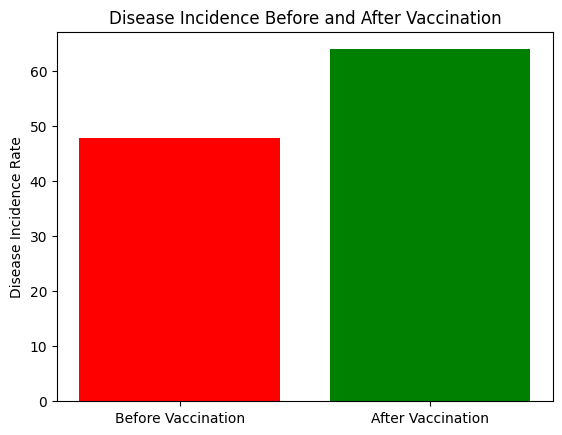

In [15]:
import matplotlib.pyplot as plt

# Bar plot
plt.bar(['Before Vaccination', 'After Vaccination'], [before_vaccination, after_vaccination], color=['red', 'green'])
plt.ylabel("Disease Incidence Rate")
plt.title("Disease Incidence Before and After Vaccination")
plt.show()


In [17]:
# Define vaccine introduction year (adjust based on actual data)
vaccine_year = 1995  

# Compute average incidence before and after vaccination introduction
before_vaccine = merged_df[merged_df['YEAR'] < vaccine_year]['INCIDENCE_RATE'].mean()
after_vaccine = merged_df[merged_df['YEAR'] >= vaccine_year]['INCIDENCE_RATE'].mean()

# Compute percentage decrease
decrease_percentage = ((before_vaccine - after_vaccine) / before_vaccine) * 100

print(f"Avg Incidence Before {vaccine_year}: {before_vaccine:.2f}")
print(f"Avg Incidence After {vaccine_year}: {after_vaccine:.2f}")
print(f"Disease Incidence Decrease: {decrease_percentage:.2f}%")


Avg Incidence Before 1995: 211.06
Avg Incidence After 1995: 31.17
Disease Incidence Decrease: 85.23%


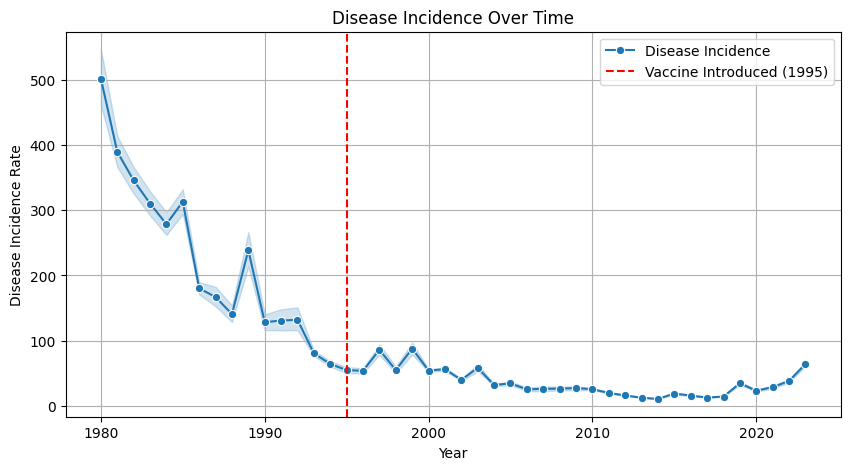

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define vaccine introduction year (adjust if needed)
vaccine_year = 1995  

# Set figure size
plt.figure(figsize=(10, 5))

# Plot the incidence rate over the years
sns.lineplot(x=merged_df['YEAR'], y=merged_df['INCIDENCE_RATE'], marker='o', label="Disease Incidence")

# Add a vertical line to indicate the vaccine introduction year
plt.axvline(x=vaccine_year, color='r', linestyle='--', label=f"Vaccine Introduced ({vaccine_year})")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Disease Incidence Rate")
plt.title("Disease Incidence Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [21]:
coverage_data.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'ANTIGEN', 'ANTIGEN_DESCRIPTION',
       'COVERAGE_CATEGORY', 'COVERAGE_CATEGORY_DESCRIPTION', 'TARGET_NUMBER',
       'DOSES', 'COVERAGE'],
      dtype='object')

In [23]:
incidence_data.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'DISEASE', 'DISEASE_DESCRIPTION',
       'DENOMINATOR', 'INCIDENCE_RATE'],
      dtype='object')

In [19]:

dose_counts = coverage_data.groupby(["NAME", "DOSES"]).agg({"COVERAGE": "mean"}).reset_index()

# Compute drop-off rate between doses
dose_counts['DROP_OFF'] = dose_counts.groupby("NAME")['COVERAGE'].pct_change() * 100

# Display average drop-off rate
avg_drop_off = dose_counts['DROP_OFF'].mean()
st.write(f"### **Average Drop-off Rate Between Doses:** {avg_drop_off:.2f}%")

# Plot drop-off trend
sns.lineplot(data=dose_counts, x="DOSES", y="COVERAGE", hue="NAME", marker='o', ax=ax)
ax.set_xlabel("Dose Number")
ax.set_ylabel("Coverage (%)")
ax.set_title("Drop-off Rate Between Doses")
ax.legend(title="Vaccine")

NameError: name 'st' is not defined

In [25]:
print(coverage_data['NAME'].unique())

['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'Albania' 'Andorra'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia (Plurinational State of)' 'Brazil' 'Barbados'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Chile' 'China' "Côte d'Ivoire" 'Cameroon'
 'Democratic Republic of the Congo' 'Congo' 'Cook Islands' 'Colombia'
 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Curaçao' 'Cayman Islands'
 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt' 'Eritrea' 'Spain'
 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia (Federated States of)' 'Gabon'
 'United Kingdom of Great Britain and Northern Ireland' 'Georgia' 'Ghana'
 'Guinea' 'Gambia' 'Guinea-Bissau' 'Equatoria

In [27]:
vaccine_schedule_data.columns

Index(['ISO_3_CODE', 'COUNTRYNAME', 'WHO_REGION', 'YEAR', 'VACCINECODE',
       'VACCINE_DESCRIPTION', 'SCHEDULEROUNDS', 'TARGETPOP',
       'TARGETPOP_DESCRIPTION', 'GEOAREA', 'AGEADMINISTERED', 'SOURCECOMMENT'],
      dtype='object')

In [28]:
print(vaccine_schedule_data["TARGETPOP"].unique())


['RISKGROUPS' 'B_2YL_W' 'B_CHILD_W' 'TRAVELLERS' 'HW' 'FEMALE' 'ADULTS'
 'PW' 'CATCHUP_A' 'CATCHUP_C' 'BOTH' 'B_ADO_W' 'B_2YL_F' 'B_ADO_F'
 'B_CHILD_F']


In [29]:
print(vaccine_schedule_data["TARGETPOP"].dtype)  

object


In [30]:
print(vaccine_schedule_data.shape)
print(vaccine_schedule_data.head())


(8053, 12)
  ISO_3_CODE COUNTRYNAME WHO_REGION    YEAR VACCINECODE  \
0        ABW       Aruba       AMRO  2023.0  DTAPHIBIPV   
1        ABW       Aruba       AMRO  2023.0  DTAPHIBIPV   
2        ABW       Aruba       AMRO  2023.0  DTAPHIBIPV   
3        ABW       Aruba       AMRO  2023.0  DTAPHIBIPV   
4        ABW       Aruba       AMRO  2023.0     DTAPIPV   

                VACCINE_DESCRIPTION  SCHEDULEROUNDS   TARGETPOP  \
0  DTaP-Hib-IPV (acellular) vaccine             1.0  RISKGROUPS   
1  DTaP-Hib-IPV (acellular) vaccine             2.0  RISKGROUPS   
2  DTaP-Hib-IPV (acellular) vaccine             3.0  RISKGROUPS   
3  DTaP-Hib-IPV (acellular) vaccine             4.0     B_2YL_W   
4      DTaP-IPV (acellular) vaccine             5.0   B_CHILD_W   

  TARGETPOP_DESCRIPTION   GEOAREA AGEADMINISTERED SOURCECOMMENT  
0       General/routine  NATIONAL              M2     0-11 mois  
1       General/routine  NATIONAL              M4     0-11 mois  
2       General/routine  NATIONAL

In [31]:
pivot_df = vaccine_schedule_data.pivot_table(
    index="VACCINE_DESCRIPTION", 
    columns="SCHEDULEROUNDS", 
    values="TARGETPOP", 
    aggfunc="mean"
).reset_index()
print(pivot_df.shape)
print(pivot_df.head())


TypeError: agg function failed [how->mean,dtype->object]